In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util
from skimage.morphology import disk
from skimage.filters.rank import median


# Adaptive median filter

In [20]:
def am(a,x,y):
    I=a.shape[0]
    J=a.shape[1]
    windowsize=3
    Smax=7
    zxy=a[x,y]
    while(windowsize<=Smax):
        d=np.int((windowsize-1)/2)
        s=a[max(0,x-d):min(I,x+d+1),max(0,y-d):min(J,y+d+1)]
        zmin=np.min(s)
        zmed=np.median(s)
        zmax=np.max(s)
        A1=zmed-zmin
        A2=zmed-zmax
        if A1 > 0 and A2 < 0:
            B1=zxy-zmin
            B2=zxy-zmax
            if B1 > 0 and B2 < 0:
                return zxy
            else:
                return zmed
        else:
            windowsize=windowsize+2
    return zmed


In [ ]:
a=data.coins()
#a=np.uint8(np.random.rand(5,5)*255)
a=util.noise.random_noise(a,'s&p')
b=a.copy()
a=np.float64(a)
I=a.shape[0]
J=a.shape[1]
for i in range(I):
    for j in range(J):
        b[i,j]=am(a,i,j)

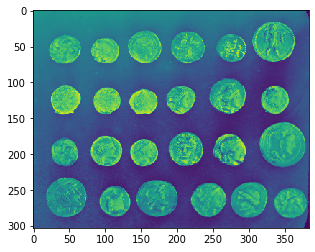

In [24]:
#plt.imshow(b[0:50,100:150])
plt.imshow(b)

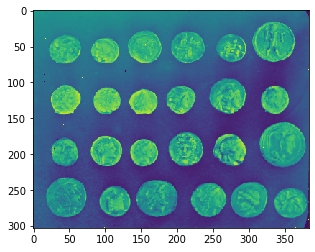

In [29]:
med = median(a, disk(1))
plt.imshow(med)

# image blure

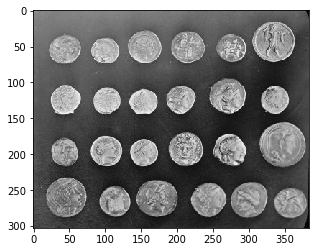

In [3]:
im=data.coins()
plt.imshow(im,cmap='gray')

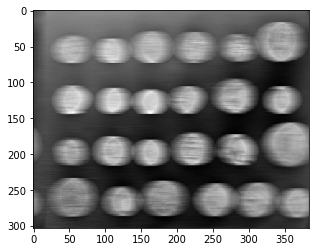

In [6]:
imf=np.fft.fft2(im)
kernel=np.ones((1,20))
kernel=kernel/np.sum(kernel)
kf=np.fft.fft2(kernel,(im.shape[0],im.shape[1]))
g=imf*kf
im_g=np.uint8(np.abs(np.fft.ifft2(g)))
plt.imshow(im_g,cmap='gray')

# inverse filter

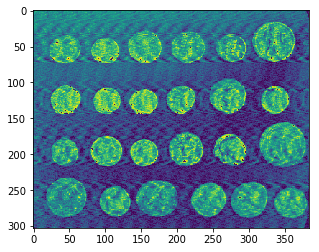

In [12]:
h=np.fft.fft2(im_g)/(0.01+kf)
im_i=np.uint8(np.abs(np.fft.ifft2(h)))
plt.imshow(im_i)

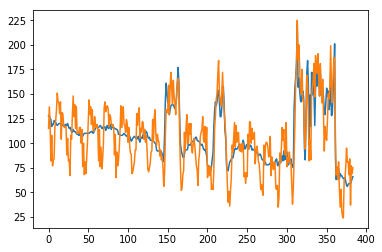

In [13]:
#plt.imshow(im_i)
plt.plot(im[30,:])
#im_i[30:35,:]=255
plt.plot(im_i[30,:])

# wiener filter

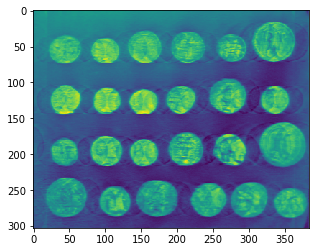

In [15]:
h=np.fft.fft2(im_g)*np.conj(kf)/(0.01+np.abs(kf)**2)
im_w=np.uint8(np.abs(np.fft.ifft2(h)))
plt.imshow(im_w)

# image blure with noise

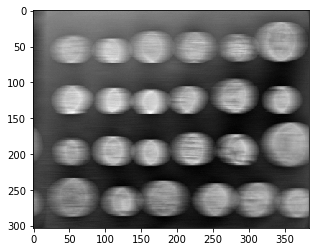

In [17]:
im_gn=np.uint8(util.noise.random_noise(im_g,var=0.00001)*255)
plt.imshow(im_gn,cmap='gray')
#plt.plot(im_g[100,100:150])
#plt.plot(im_gn[100,100:150])

# inverse filter with noise

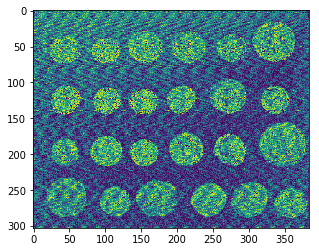

In [18]:
h=np.fft.fft2(im_gn)/(0.01+kf)
plt.imshow(np.uint8(np.abs(np.fft.ifft2(h))))

# wiener filter with noise

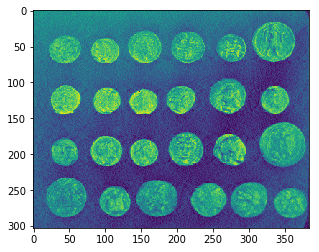

In [19]:
h=np.fft.fft2(im_gn)*np.conj(kf)/(0.001+np.abs(kf)**2)
im_wgn=np.uint8(np.abs(np.fft.ifft2(h)))
plt.imshow(im_wgn)

# geometry_transform

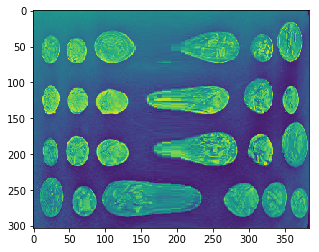

In [20]:
im=data.coins()
imtf=np.zeros(im.shape,dtype=np.uint8)
x,y=im.shape
s=y/2
for i in range(x):
    for j in range(y):
        newj=s+np.sign(j-s)*(np.abs(j-s)/s)**2*s
        if newj>=0 and newj<y:
            imtf[i,j]=im[i,np.int(newj)]
plt.imshow(imtf)

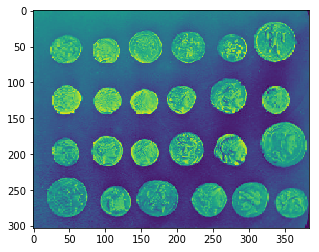

In [21]:
iminv=np.zeros(im.shape,dtype=np.uint8)
for i in range(x):
    for j in range(y):
        newj=s+np.sign(j-s)*np.sqrt(np.abs(j-s)/s)*s
        if newj>=0 and newj<y:
            iminv[i,j]=imtf[i,np.int(newj)]
plt.imshow(iminv)